# WITH PANDAS AND MATPLOTLIB

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [16]:
df = pd.read_csv('PoliceKillingsUS.csv')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [14]:
df.shape

(2535, 14)

## 1: Plot number of people by gender

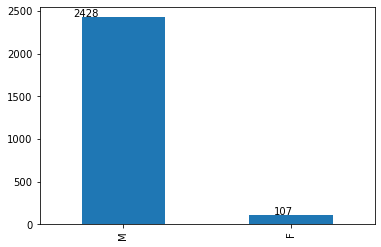

In [24]:
ax= df['gender'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.200, p.get_height() *1.005));

In [11]:
df['gender'].value_counts()

M    2428
F     107
Name: gender, dtype: int64

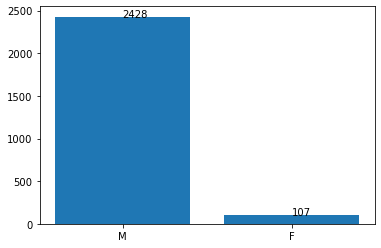

In [13]:

plt.bar(df['gender'].unique(),df['gender'].value_counts())

for i, v in enumerate(df['gender'].value_counts()):
    plt.text(i, v, str(v));

## 2: Plot 7 most common kill weapons

In [7]:
df['armed'].value_counts()[:8]

gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
machete             18
unknown weapon      18
Name: armed, dtype: int64

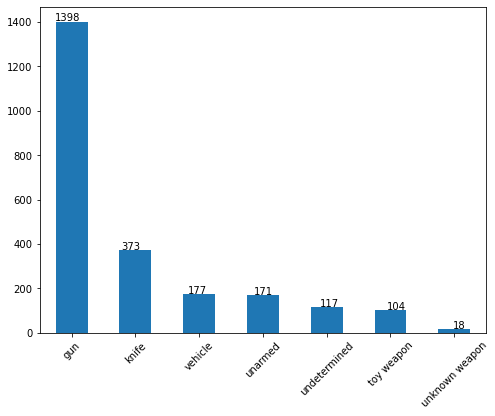

In [15]:
plt.figure(figsize=(8,6))
ax= df['armed'].value_counts()[:7].plot(kind='bar')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.040, p.get_height() *1.005));

In [9]:
df['armed'].value_counts()[:7].index

Index(['gun', 'knife', 'vehicle', 'unarmed', 'undetermined', 'toy weapon',
       'machete'],
      dtype='object')

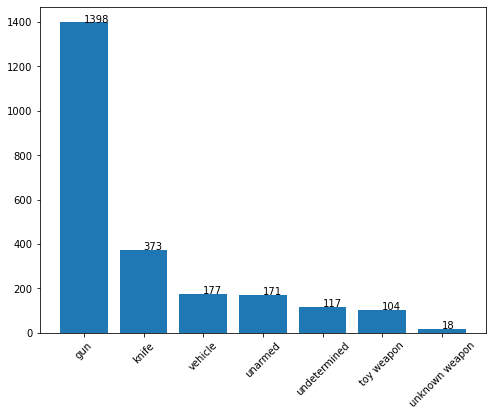

In [19]:
plt.figure(figsize=(8,6))
plt.bar(df['armed'].value_counts()[:7].index,df['armed'].value_counts()[:7])
plt.xticks(rotation=45)

for i, v in enumerate(df['armed'].value_counts()[:7]):
    plt.text(i, v, str(v));

## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [11]:
df[df['age']<25].head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
5,11,Kenneth Joe Brown,04/01/15,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,13,Kenneth Arnold Buck,05/01/15,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False
22,43,Brian Barbosa,11/01/15,shot,gun,23.0,M,H,South Gate,CA,False,attack,Not fleeing,False
26,49,Marcus Golden,14/01/15,shot,vehicle,24.0,M,B,St. Paul,MN,False,attack,Not fleeing,False


In [12]:
df[df['age']>25].head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
7,15,Brock Nichols,06/01/15,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False


In [7]:
def ag(ages):
    if ages > 25:
        return 'above25'
    else:
        return 'below25'

In [8]:
age_cat=df['age'].apply(ag)
age_cat.value_counts()

## Another way with replace

#df['age_cat'] = (df['age'] > 25)
#df.age_cat.replace({True: 'above25', False: 'below25'})

above25    1905
below25     630
Name: age, dtype: int64

In [5]:
age_cat1=df['age'] > 25
age_cat1.replace({True: 'above25', False: 'below25'}, inplace=True)
age_cat1.value_counts()

above25    1905
below25     630
Name: age, dtype: int64

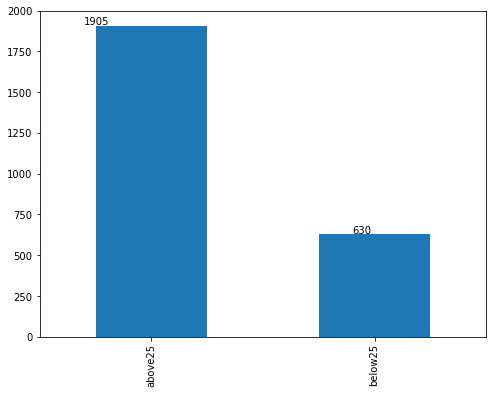

In [22]:
plt.figure(figsize=(8,6))
ax= age_cat.value_counts().plot(kind='bar')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.200, p.get_height() *1.005));

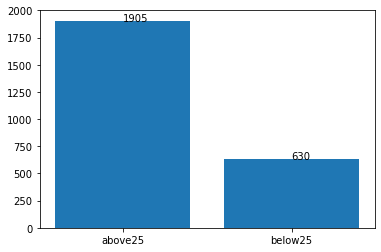

In [23]:
plt.bar(age_cat.unique(),age_cat.value_counts())

for i, v in enumerate(age_cat.value_counts()):
    plt.text(i, v, str(v));

## 4: Plot number of killed poeple by race

In [17]:
df['race'].value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

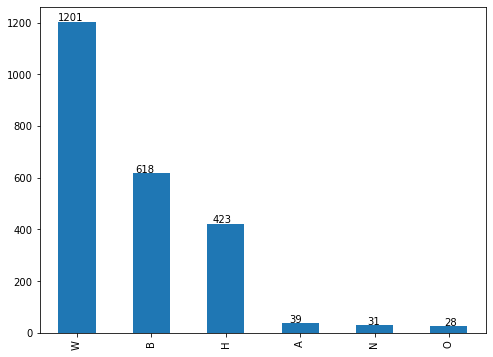

In [24]:
plt.figure(figsize=(8,6))
ax= df['race'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.040, p.get_height() *1.005));

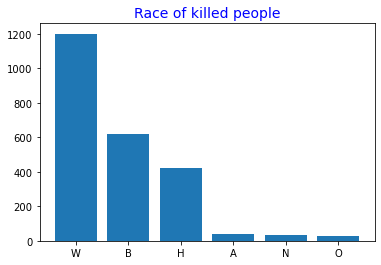

In [38]:
plt.bar(df['race'].value_counts().index,df['race'].value_counts())
plt.title('Race of killed people', fontdict= {'fontsize':14,'color':'blue'});

## 5: Killed People According to Races (Pie Chart)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [20]:
race= df['race']
race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [21]:
race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [26]:
df1= df.dropna()
df1.shape

(2254, 14)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [40]:
df1['race'].value_counts()

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [41]:
df1['race'].value_counts().index

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [42]:
race_val = df1['race'].value_counts()
race_val.unique()

array([1168,  592,  401,   36,   29,   28])

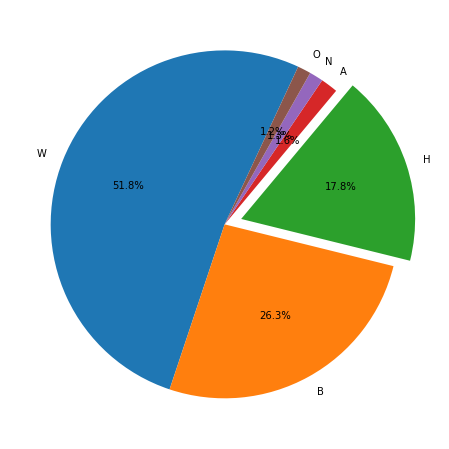

In [43]:
plt.figure(figsize=(12,8))
explode = [0,0,0.1,0,0,0]
labels= race_val.index
plt.pie(race_val.unique(), labels=labels, explode=explode, startangle=65, autopct='%1.1f%%');


## 6: Most common 15 Name or Surname of killed people 

In [44]:
df1.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [45]:
df1.shape

(2254, 14)

In [46]:
df1['name'].value_counts()

Michael Johnson             2
Daquan Antonio Westbrook    2
Eric Harris                 2
Brandon Jones               2
Michael Brown               2
                           ..
Justin D. McHenry           1
Matthew Ryan Graham         1
Anthony McKinney            1
Ryan Quinn Martin           1
Jonathan Larry Harden       1
Name: name, Length: 2249, dtype: int64

In [ ]:
# Problem: TK TK is most probably not a name or surname. We will clean them.


0             [Tim, Elliot]
1      [Lewis, Lee, Lembke]
2    [John, Paul, Quintero]
3        [Matthew, Hoffman]
4      [Michael, Rodriguez]
Name: name, dtype: object

In [47]:
filt = (df1['name']== 'TK TK') | (df1['name']== 'TK Tk')
df1.loc[filt]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2465,2748,TK TK,05/07/17,shot,undetermined,24.0,M,H,Vista,CA,False,undetermined,Foot,False


In [48]:
df1= df1.drop(2465, axis=0)
df1.shape

(2253, 14)

**INSTRUCTION : Plot Most common 15 Name OR Surname of killed people** 

shape

In [49]:
pairs = df1['name'].str.split()
pairs

0                [Tim, Elliot]
1         [Lewis, Lee, Lembke]
2       [John, Paul, Quintero]
3           [Matthew, Hoffman]
4         [Michael, Rodriguez]
                 ...          
2519            [Aries, Clark]
2523     [Kesharn, K., Burney]
2525       [Deltra, Henderson]
2533          [Isaiah, Tucker]
2534           [Dwayne, Jeune]
Name: name, Length: 2253, dtype: object

In [50]:
pairs.shape

(2253,)

In [51]:
pairs[0]

['Tim', 'Elliot']

In [52]:
names, surnames = zip(*pairs)

In [53]:
names[0]

'Tim'

In [54]:
name_surname= names+surnames
name_surname_counts= Counter(name_surname)

In [57]:
name_surname_counts

Counter({'Tim': 3,
         'Lewis': 5,
         'John': 36,
         'Matthew': 22,
         'Michael': 82,
         'Kenneth': 17,
         'Brock': 1,
         'Autumn': 1,
         'Leslie': 2,
         'Patrick': 12,
         'Ron': 2,
         'Hashim': 1,
         'Nicholas': 13,
         'Omarr': 1,
         'Loren': 3,
         'James': 46,
         'Artago': 1,
         'Thomas': 23,
         'Jimmy': 5,
         'Andy': 1,
         'Tommy': 3,
         'Brian': 9,
         'Salvador': 4,
         'Richard': 33,
         'Marcus': 4,
         'Mario': 8,
         'Talbot': 1,
         'Robert': 44,
         'Jeffrey': 17,
         'Donte': 3,
         'Kavonda': 1,
         'Quincy': 2,
         'Jose': 23,
         'Nathan': 6,
         'Scott': 21,
         'Zaki': 1,
         'Terence': 3,
         'Pablo': 3,
         'Daniel': 40,
         'Jonathan': 10,
         'Carter': 2,
         'Paul': 16,
         'Dewayne': 3,
         'Todd': 9,
         'Miguel': 9,
         

In [56]:
most_common_name_surname= name_surname_counts.most_common(15)
most_common_name_surname

[('Michael', 82),
 ('David', 53),
 ('James', 46),
 ('Robert', 44),
 ('Joseph', 43),
 ('Daniel', 40),
 ('William', 40),
 ('John', 36),
 ('Lee', 36),
 ('Christopher', 35),
 ('Richard', 33),
 ('J.', 30),
 ('Joshua', 27),
 ('Anthony', 25),
 ('Thomas', 23)]

In [58]:
name_df=pd.DataFrame(most_common_name_surname, columns=['Names or Surnames', 'Frequency'] )
name_df

,Names or Surnames,Frequency
0,Michael,82
1,David,53
2,James,46
3,Robert,44
4,Joseph,43
5,Daniel,40
6,William,40
7,John,36
8,Lee,36
9,Christopher,35


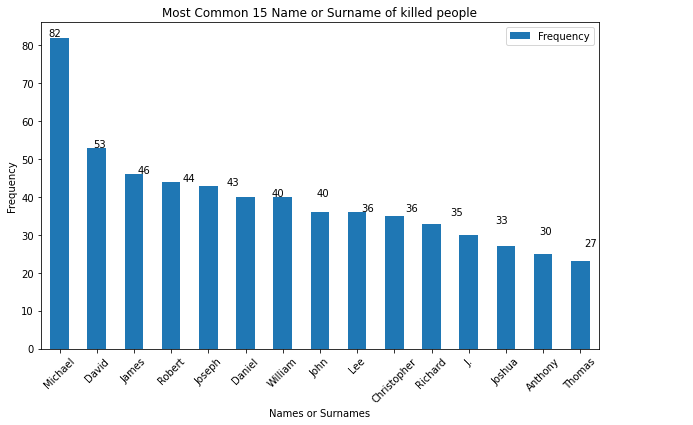

In [59]:
ax= name_df.plot(kind='bar', x= 'Names or Surnames',y= 'Frequency', figsize=(10,6))
plt.title('Most Common 15 Name or Surname of killed people')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.200, p.get_height() *1.005));

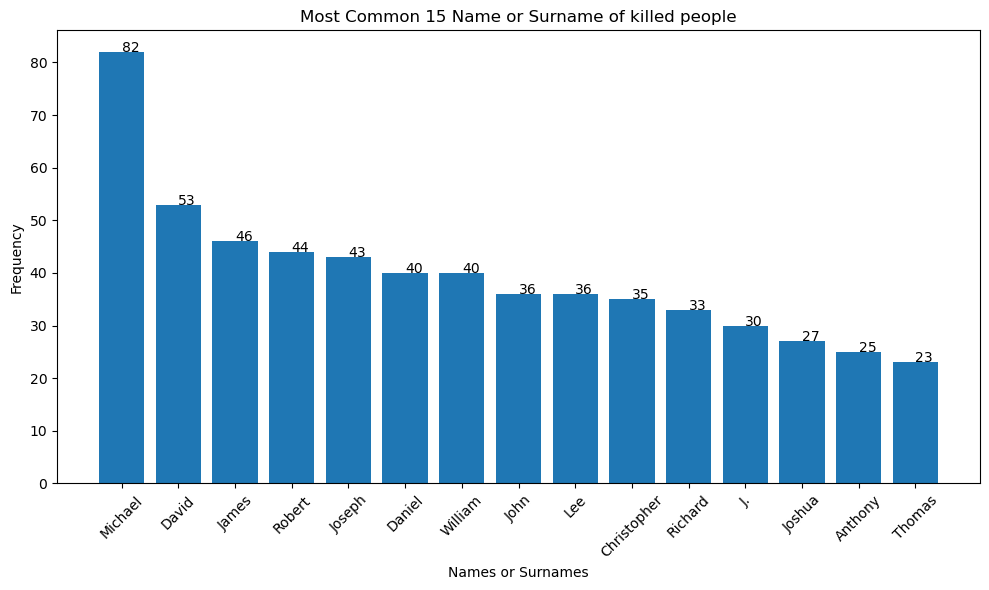

In [60]:
plt.figure(figsize=(10,6), dpi=100)
plt.bar(name_df['Names or Surnames'],name_df['Frequency'])
plt.xlabel('Names or Surnames')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title('Most Common 15 Name or Surname of killed people')
plt.tight_layout()
for i, v in enumerate(name_df['Frequency']):
    plt.text(i, v, str(v));